In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)] #petal length, petal width
y = (iris['target'] == 2).astype(np.float64) #Iris virginica

In [3]:
svm_clf = Pipeline([('scaler',StandardScaler()),('linear_svc',LinearSVC(C=1, loss='hinge'))])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

## SVM with Polynomial Features

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [5]:
X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([('poly_features',PolynomialFeatures(degree=3)),('scaler',StandardScaler()),('svm_clf',LinearSVC(C=10, loss = 'hinge'))])

polynomial_svm_clf.fit(X,y)

/Users/abhinaykumar/Desktop/Self Study/HandsonML/my_env/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

### Polynomial Kernel vs polynomial features

In [6]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),('svm_clf',SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [7]:
h = 0.02 #mesh step size
x_min,x_max = X[:,0].min(),X[:,0].max()
y_min, y_max = X[:,1].min(),X[:,1].max()
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])



In [8]:
Z

array([1, 1, 1, ..., 0, 0, 1])

In [9]:
len(Z)

16008

In [10]:
len(xx)

92

In [11]:
len(np.c_[xx.ravel(),yy.ravel()])

16008

In [12]:
len(xx.ravel())

16008

In [13]:
xx

array([[-1.25314082, -1.23314082, -1.21314082, ...,  2.16685918,
         2.18685918,  2.20685918],
       [-1.25314082, -1.23314082, -1.21314082, ...,  2.16685918,
         2.18685918,  2.20685918],
       [-1.25314082, -1.23314082, -1.21314082, ...,  2.16685918,
         2.18685918,  2.20685918],
       ...,
       [-1.25314082, -1.23314082, -1.21314082, ...,  2.16685918,
         2.18685918,  2.20685918],
       [-1.25314082, -1.23314082, -1.21314082, ...,  2.16685918,
         2.18685918,  2.20685918],
       [-1.25314082, -1.23314082, -1.21314082, ...,  2.16685918,
         2.18685918,  2.20685918]])

In [14]:
len(xx[0])

174

In [15]:
yy

array([[-0.63147939, -0.63147939, -0.63147939, ..., -0.63147939,
        -0.63147939, -0.63147939],
       [-0.61147939, -0.61147939, -0.61147939, ..., -0.61147939,
        -0.61147939, -0.61147939],
       [-0.59147939, -0.59147939, -0.59147939, ..., -0.59147939,
        -0.59147939, -0.59147939],
       ...,
       [ 1.14852061,  1.14852061,  1.14852061, ...,  1.14852061,
         1.14852061,  1.14852061],
       [ 1.16852061,  1.16852061,  1.16852061, ...,  1.16852061,
         1.16852061,  1.16852061],
       [ 1.18852061,  1.18852061,  1.18852061, ...,  1.18852061,
         1.18852061,  1.18852061]])

In [16]:
len(yy)

92

In [17]:
len(yy[0])

174

In [18]:
# putting the results into a color plot

Z = Z.reshape(xx.shape)
# len(Z)

### Plotting the SVM decision boundary

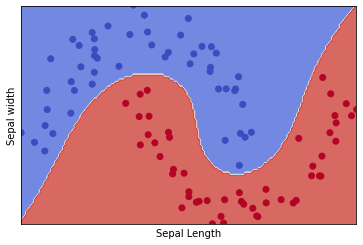

In [19]:
import matplotlib.pyplot as plt
plt.contourf(xx,yy,Z,cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.coolwarm)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

## RBF Kernel

In [20]:
rbf_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),('svm_clf',SVC(kernel = 'rbf',gamma = 5, C = 0.001))])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])